## Machine Learning Project: Simple Linear Regression on Salary Data

This project provides a complete end-to-end implementation of **Simple Linear Regression** using a real-world dataset. It covers the essential steps of a typical machine learning workflow — from understanding the data to interpreting the final model.

Key stages include **Exploratory Data Analysis (EDA)**, **Feature Engineering**, **Assumption Checks**, **Model Training & Evaluation**. Each step is thoroughly explained and supported with both code and visualizations to enhance understanding of the regression modeling process.


### Dataset
- **Name:** SalaryPrediction  
- **Source:** Kaggle 
- **Description:** The dataset contains information on employees’ **years of experience** and their corresponding **salaries**, allowing us to predict salary based on experience using a linear approach.

##### 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

##### 2. Load Dataset and Preview

In [2]:
df = pd.read_csv(
    filepath_or_buffer='data/SalaryPrediction.csv'
)
df.head()

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525


##### 3. Exploratory Data Analysis (EDA)

In [3]:
df.info()
df.shape
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Experience Years  40 non-null     float64
 1   Salary            40 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 772.0 bytes


,Experience Years,Salary
count,40.000000,40.000000
mean,5.152500,74743.625000
std,2.663715,25947.122885
min,1.100000,37731.000000
25%,3.200000,56878.250000
50%,4.600000,64472.500000
75%,6.875000,95023.250000
max,10.500000,122391.000000


##### Scatterplot: Salary vs. Experience

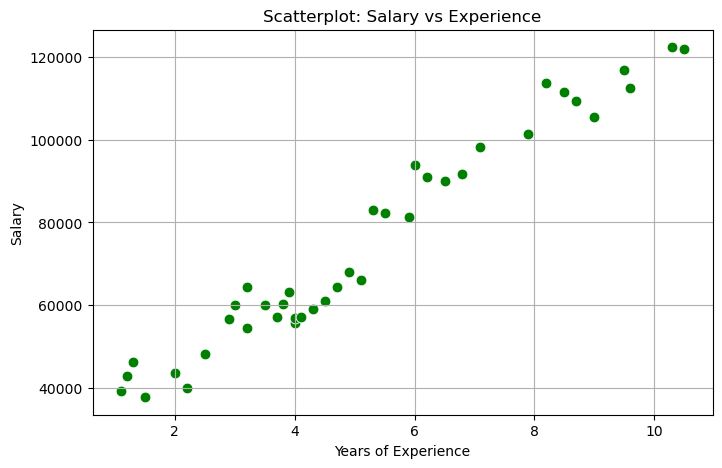

In [15]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Experience Years', y='Salary', color='green', s=60)
plt.title("Scatterplot: Salary vs Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.grid(True)
plt.show()

##### Boxplot: Salary Distribution

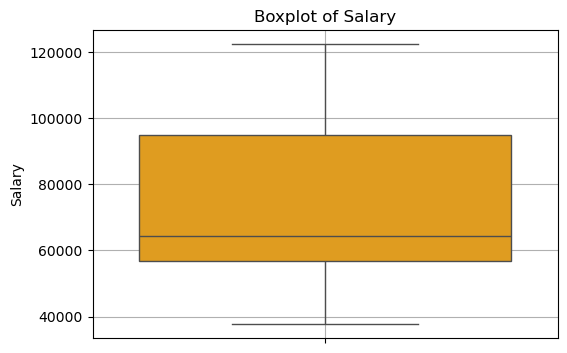

In [16]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['Salary'], color='orange')
plt.title("Boxplot of Salary")
plt.ylabel("Salary")
plt.grid(True)
plt.show()

##### 4. Missing Values and Data Types

In [4]:
print(df.isnull().sum())
print(df.dtypes)

Experience Years    0
Salary              0
dtype: int64
Experience Years    float64
Salary                int64
dtype: object


Split features:

In [5]:
categorical_columns = df.select_dtypes(include='object').columns
numerical_columns = df.select_dtypes(exclude='object').columns

print('Categorical Columns:', categorical_columns)
print('Numerical Columns:', numerical_columns)

Categorical Columns: Index([], dtype='object')
Numerical Columns: Index(['Experience Years', 'Salary'], dtype='object')


##### 5. Cardinality Analysis (Categorical Columns Only)

In [6]:
for col in categorical_columns:
    print(f'{col}: {df[col].nunique()} unique values')

##### 6. Feature Engineering

In [7]:
# We can create new features like:
df['ExperienceLevel'] = pd.cut(df['Experience Years'],
                               bins=[0, 2, 5, 10, 20],
                               labels=['Junior', 'Mid', 'Senior', 'Expert'])
#Or, a ratio feature (if logical):
# Example placeholder: df['Ratio'] = df['Salary'] / df['Experience Years']

##### 7. Assumption Check – Normal Distribution

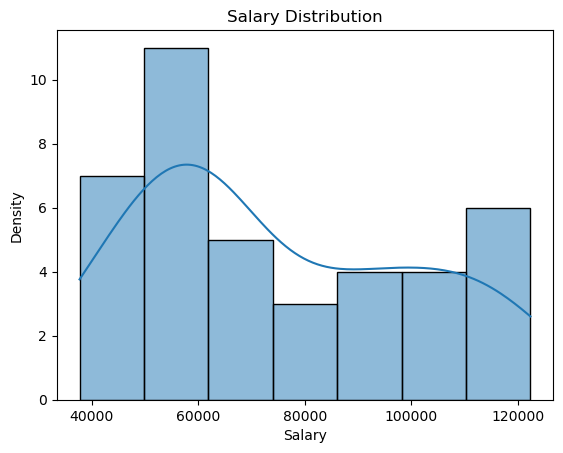

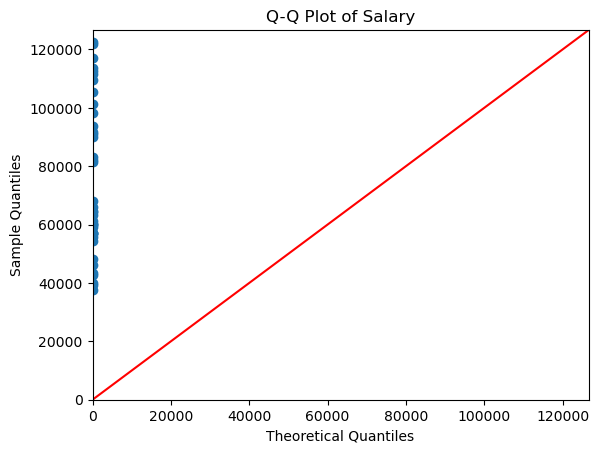

In [13]:
sns.histplot(df['Salary'], kde=True)
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Density")
plt.show()

from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

sm.qqplot(df['Salary'], line='45')
plt.title("Q-Q Plot of Salary")
plt.show()

##### 8. Prepare Data for Regression

In [9]:
X = df[['Experience Years']]
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### 9. Train Simple Linear Regression Model

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

##### 10. Evaluate Model

In [11]:
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 48077731.16919359
R² Score: 0.9068577573647874


##### 11. Visualize Regression Line

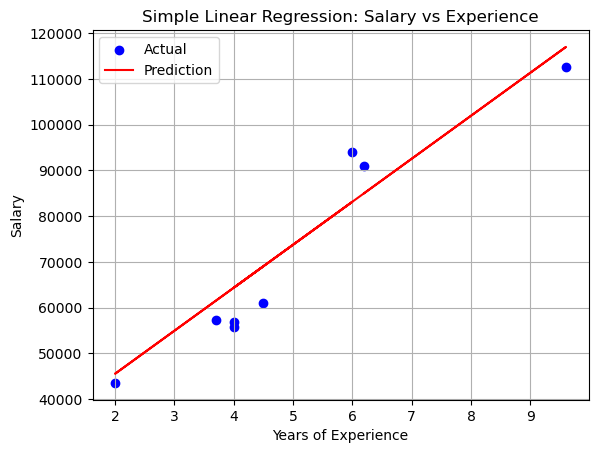

In [12]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Prediction')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Simple Linear Regression: Salary vs Experience")
plt.legend()
plt.grid(True)
plt.show()

### Model Evaluation – R² Score Explained

The **R² Score** (Coefficient of Determination) tells us how much of the variance in the target variable (`Salary`) is explained by the independent variable (`Experience Years`).

For example, an R² score of `0.95` would mean:

> 95% of the variability in salary can be explained by the years of experience, while the remaining 5% is due to other factors or randomness.

This makes the model quite effective at capturing the underlying relationship.

A high R² score such as 0.95 indicates a strong linear relationship between experience and salary, which confirms the appropriateness of using simple linear regression for this problem.